In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
data_path = "../my_tests/load1.csv"
data = np.genfromtxt(data_path, delimiter=';')
print(data)

[[0.0000000e+00 2.0000000e+02 5.2500000e-01 ... 2.0000000e+02
  2.0000000e+02 2.0000000e+02]
 [2.0000000e+02 0.0000000e+00 2.7600000e+01 ... 2.0000000e+02
  2.0000000e+02 2.0000000e+02]
 [5.2500000e-01 2.7600000e+01 0.0000000e+00 ... 2.0000000e+02
  2.0000000e+02 2.0000000e+02]
 ...
 [2.0000000e+02 2.0000000e+02 2.0000000e+02 ... 0.0000000e+00
  2.5000006e-01 4.0000007e-01]
 [2.0000000e+02 2.0000000e+02 2.0000000e+02 ... 2.5000006e-01
  0.0000000e+00 1.5000000e-01]
 [2.0000000e+02 2.0000000e+02 2.0000000e+02 ... 4.0000007e-01
  1.5000000e-01 0.0000000e+00]]


In [41]:
n=4
G=nx.complete_graph(n)
#for i in range (n):
#    for j in range (i, n-1):
for (i, j,_) in G.edges(data=True):
    G.add_weighted_edges_from({(i,j,data[i][j])})
temp = vars(G)        
for item in temp:
    print(item, ":", temp[item])

graph_attr_dict_factory : <class 'dict'>
node_dict_factory : <class 'dict'>
node_attr_dict_factory : <class 'dict'>
adjlist_outer_dict_factory : <class 'dict'>
adjlist_inner_dict_factory : <class 'dict'>
edge_attr_dict_factory : <class 'dict'>
graph : {}
_node : {0: {}, 1: {}, 2: {}, 3: {}}
_adj : {0: {1: {'weight': 200.0}, 2: {'weight': 0.525}, 3: {'weight': 0.525}}, 1: {0: {'weight': 200.0}, 2: {'weight': 27.6}, 3: {'weight': 27.6}}, 2: {0: {'weight': 0.525}, 1: {'weight': 27.6}, 3: {'weight': 0.0}}, 3: {0: {'weight': 0.525}, 1: {'weight': 27.6}, 2: {'weight': 0.0}}}


{0: array([-0.07472251, -0.58720803]), 1: array([-0.01583106, -0.10422463]), 2: array([1.        , 0.20601844]), 3: array([-0.90944643,  0.48541421])}


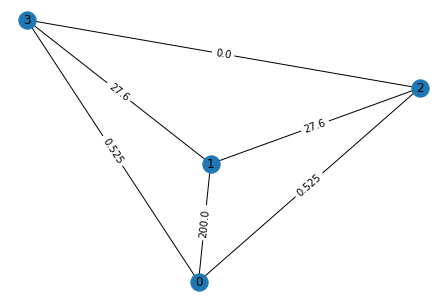

In [42]:
pos = nx.spring_layout(G)
print(pos)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
#labels = {e: str(e) for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [43]:
import dimod
import dwave_networkx as dnx
from dwave_networkx.utils import binary_quadratic_model_sampler

__all__ = ["traveling_salesperson",
           "traveling_salesperson_qubo",
           "traveling_salesman",
           "traveling_salesman_qubo",
           "is_hamiltonian_path",
           ]
print(len(G.edges))

6


In [46]:

answer = dnx.traveling_salesperson(G, dimod.ExactSolver(), start=3)

In [50]:
print(answer)

[3, 0, 2, 1]


In [52]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
answer_d = dnx.traveling_salesperson(G, EmbeddingComposite(DWaveSampler()), start=3)
print(answer_d)

[3, 3, 0, 2]


In [53]:
def is_hamiltonian_path(G, route):
    """Determines whether the given list forms a valid TSP route.

    A travelling salesperson route must visit each city exactly once.

    Parameters
    ----------
    G : NetworkX graph

        The graph on which to check the route.

    route : list

        List of nodes in the order that they are visited.

    Returns
    -------
    is_valid : bool
        True if route forms a valid travelling salesperson route.

    """

    return (set(route) == set(G))

In [56]:
print (is_hamiltonian_path(answer_d, G))

False


In [58]:
i == 0
for i in range(5):
    answer_d = dnx.traveling_salesperson(G, EmbeddingComposite(DWaveSampler()), start=0)
    print (answer_d, is_hamiltonian_path(answer_d, G))
    if is_hamiltonian_path(answer_d, G):
        break
    i+=1    

[0, 2, 1, 3] True
